In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import norm
import random

In [2]:
orig_data = np.load("/Users/oscarfuentes/baler/workspaces/MNIST/data/mnist_combined.npz")
decomp_data = np.load(
    "/Users/oscarfuentes/baler/workspaces/MNIST/MNIST_project/output/decompressed_output/decompressed.npz"
)

zeros = np.where(orig_data["names"] == 0)[0]
ones = np.where(orig_data["names"] == 1)[0]
twos = np.where(orig_data["names"] == 2)[0]
threes = np.where(orig_data["names"] == 3)[0]
fours = np.where(orig_data["names"] == 4)[0]
fives = np.where(orig_data["names"] == 5)[0]
sixes = np.where(orig_data["names"] == 6)[0]
sevens = np.where(orig_data["names"] == 7)[0]
eights = np.where(orig_data["names"] == 8)[0]
nines = np.where(orig_data["names"] == 9)[0]

diff_arr = orig_data["data"] - decomp_data["data"]
error_list = []

counter = 0
for image in diff_arr:
    error_list.append(image)
    counter += 1
    if counter % 10000 == 0:
        print(f"{counter} images processed")

10000 images processed
20000 images processed
30000 images processed
40000 images processed
50000 images processed
60000 images processed
70000 images processed


Plotting individual number graphs...

zero processing complete, total pixels: 5411952, random sample of 100000
Plotted zero graph, peak at 0.000

one processing complete, total pixels: 6175568, random sample of 100000
Plotted one graph, peak at 0.000

two processing complete, total pixels: 5480160, random sample of 100000
Plotted two graph, peak at 0.000

three processing complete, total pixels: 5598544, random sample of 100000
Plotted three graph, peak at 0.000

four processing complete, total pixels: 5350016, random sample of 100000
Plotted four graph, peak at 0.000

five processing complete, total pixels: 4949392, random sample of 100000
Plotted five graph, peak at 0.000

six processing complete, total pixels: 5390784, random sample of 100000
Plotted six graph, peak at 0.000

seven processing complete, total pixels: 5717712, random sample of 100000
Plotted seven graph, peak at 0.000

eight processing complete, total pixels: 5350800, random sample of 100000
Plotted eight graph, peak 

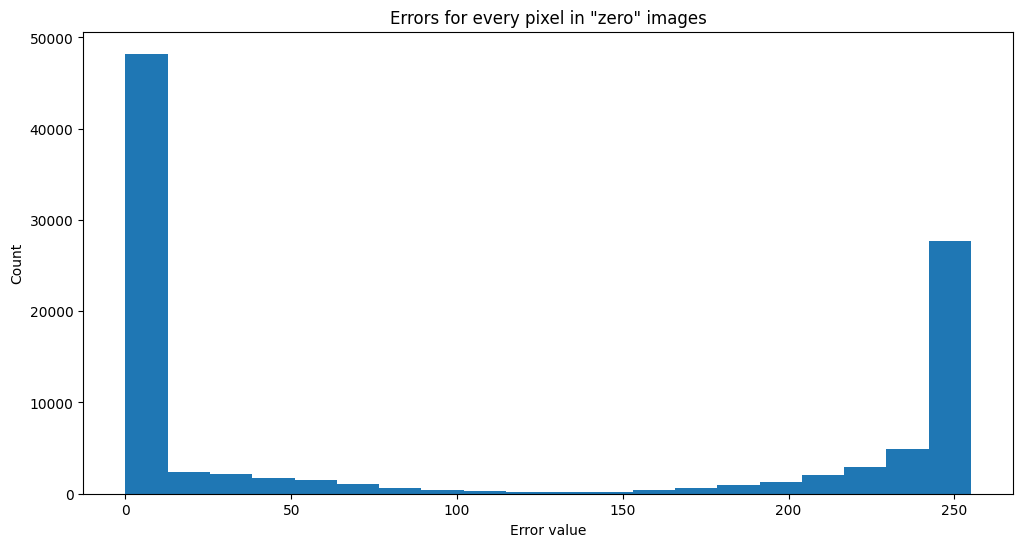

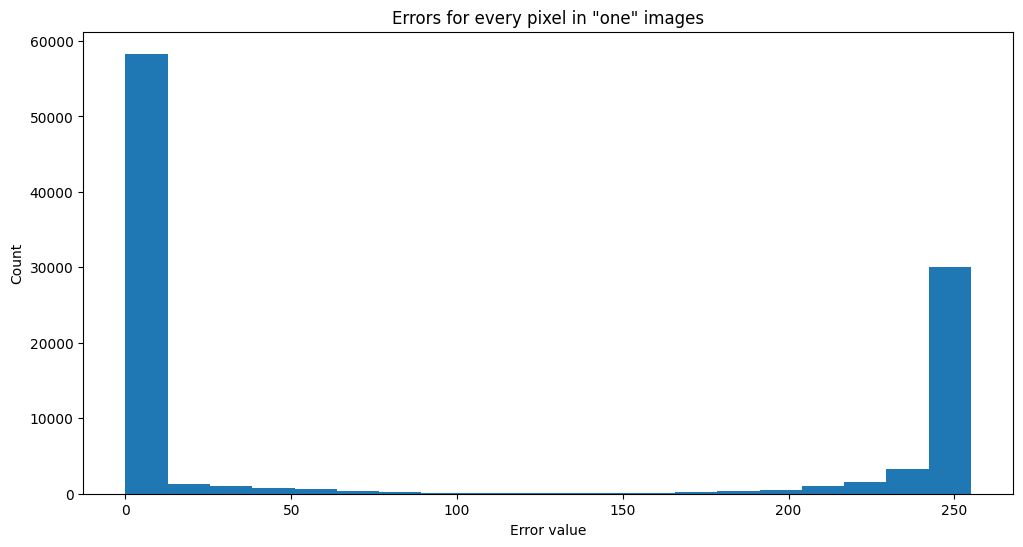

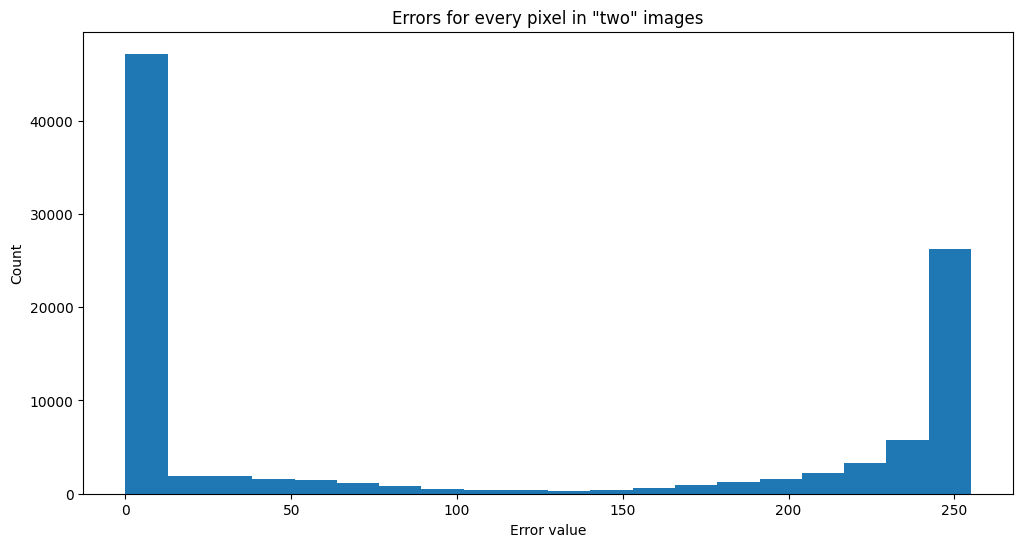

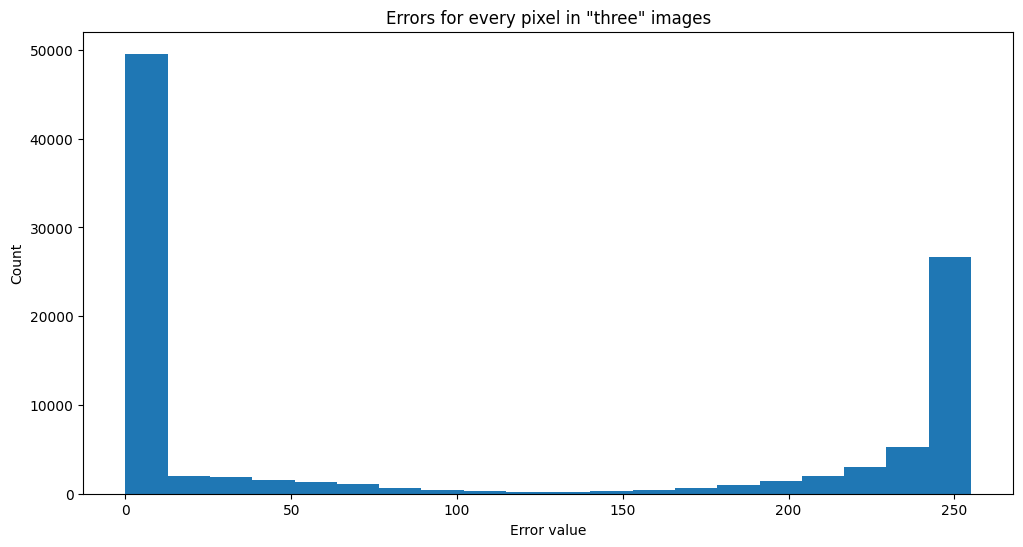

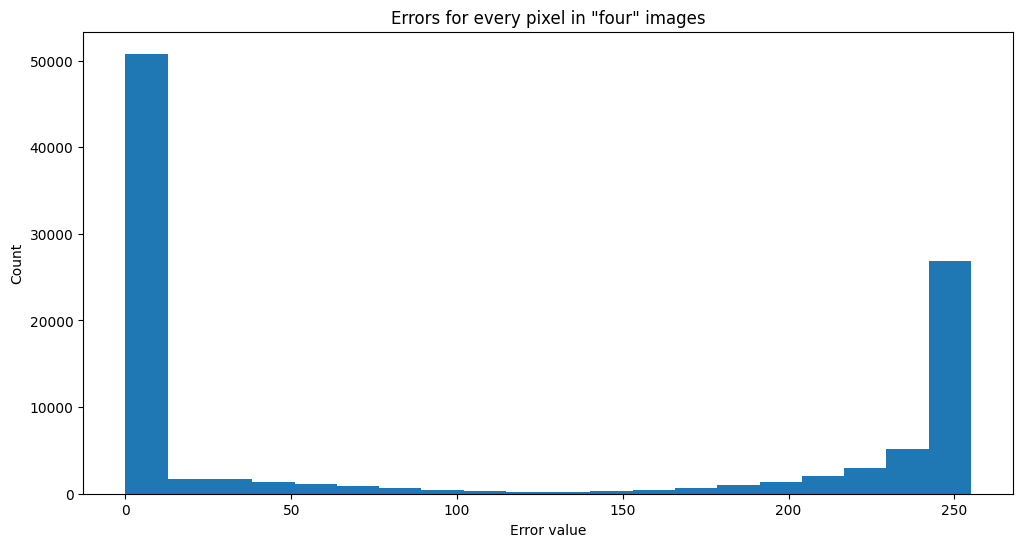

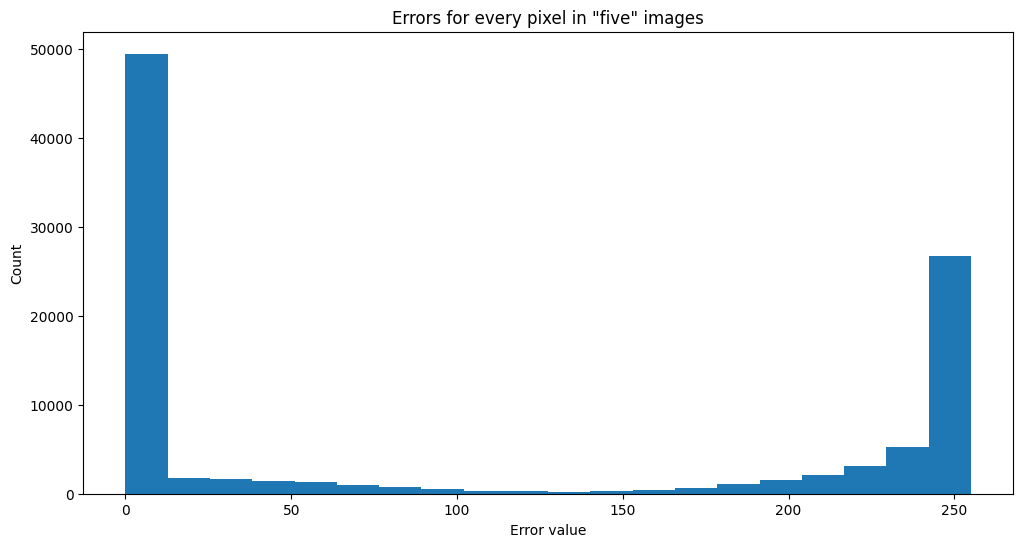

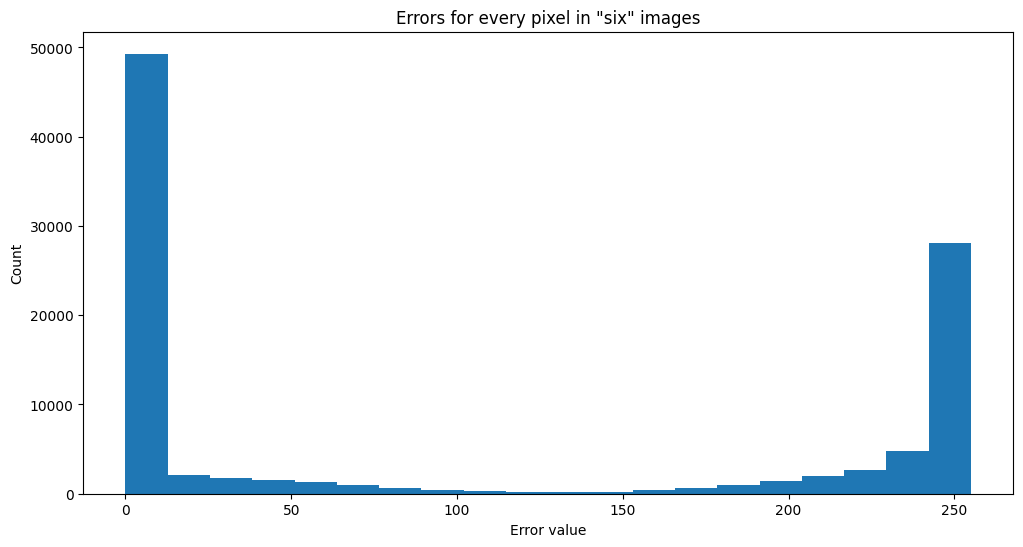

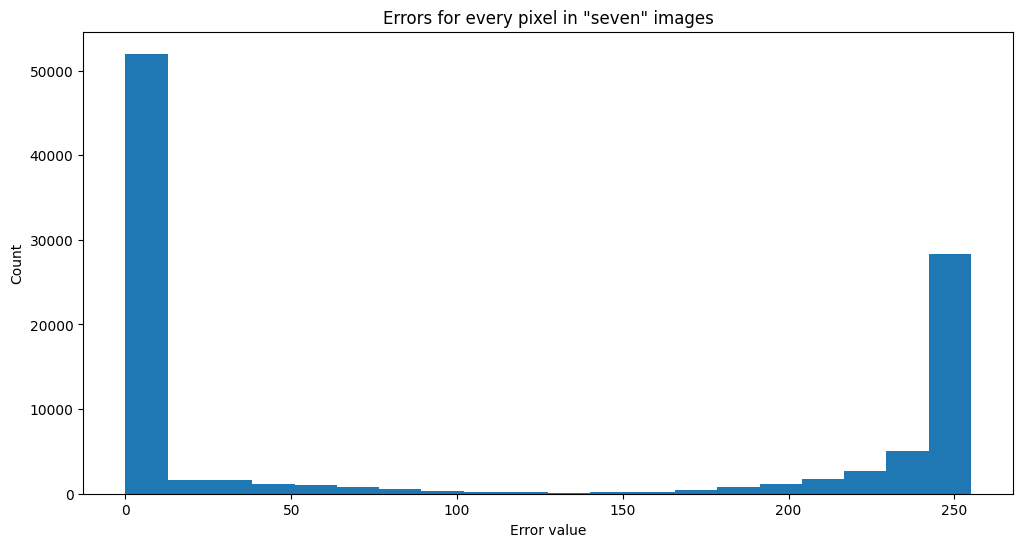

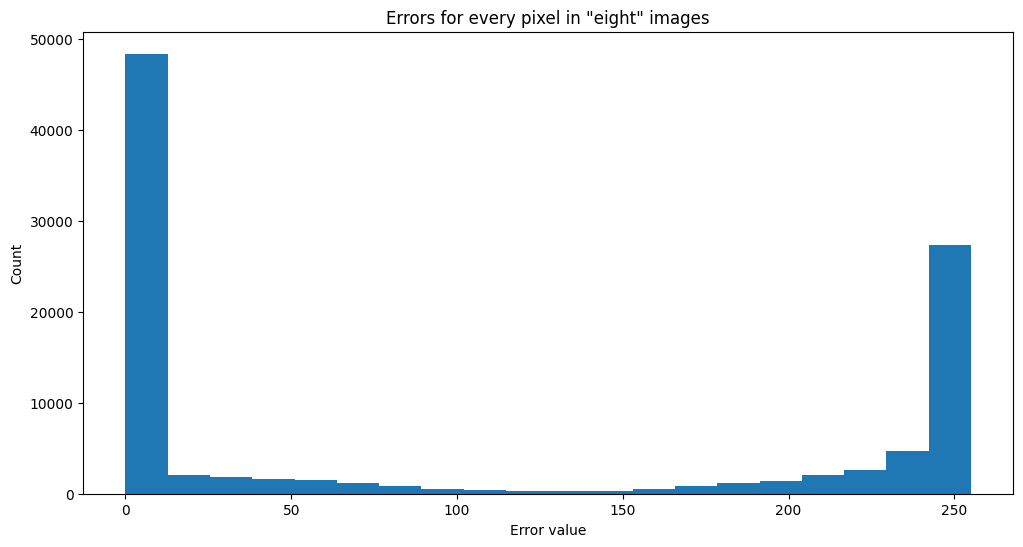

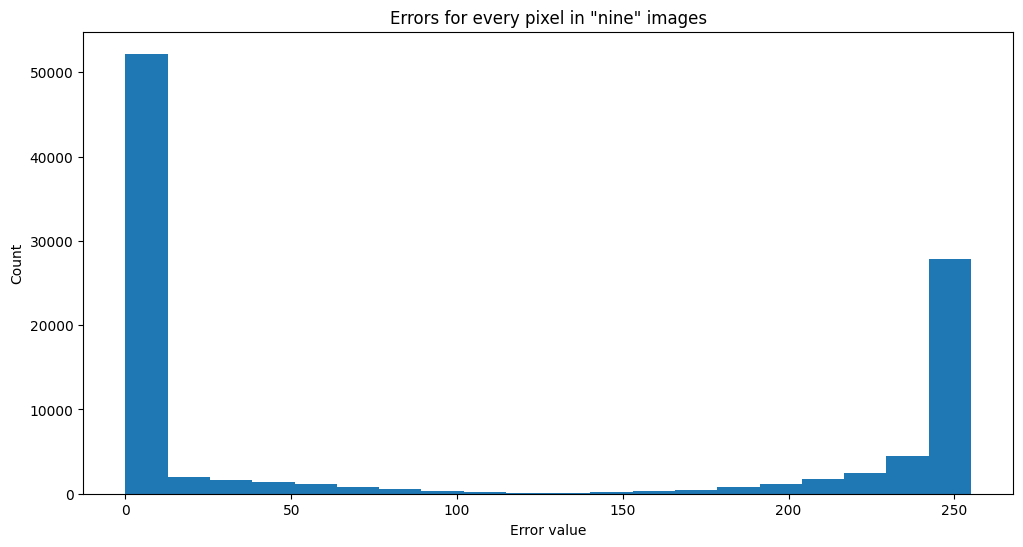

In [3]:
numbers = [
    [zeros, "zero"],
    [ones, "one"],
    [twos, "two"],
    [threes, "three"],
    [fours, "four"],
    [fives, "five"],
    [sixes, "six"],
    [sevens, "seven"],
    [eights, "eight"],
    [nines, "nine"],
]

print("Plotting individual number graphs...\n")

means = []
stds = []
SAMPLE_SIZE = 100000

for number in numbers:
    fig, ax = plt.subplots(figsize=(12, 6))

    errors = []
    for image in diff_arr[np.array(number[0])]:
        for line in image:
            for pixel in line:
                errors.append(pixel)
    
    print(f"{number[1]} processing complete, total pixels: {len(errors)}, random sample of {SAMPLE_SIZE}")
    # (mu, sigma) = norm.fit(errors)
    errors = random.sample(errors, SAMPLE_SIZE)

    n, bins, patches = ax.hist(
        errors, bins=SAMPLE_SIZE//5000, label="data"
    )
    ax.set_title('Errors for every pixel in "' + str(number[1]) + '" images')
    ax.set_xlabel("Error value")
    ax.set_ylabel("Count")

    # ax.text(
    #     min(bins),
    #     max(n) * 0.9,
    #     r"$\mu=$"+f"{mu:.3f}"+"\n"+r"$\sigma=$"+f"{sigma:.3f}",
    #     fontsize=14,
    #     fontname="Times New Roman",
    #     bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),)
    
    # y_fit = norm.pdf(bins, loc=mu, scale=sigma)
    # scaling = max(y_fit)
    # y_fit *= max(n)/scaling
    
    # ax.plot(bins, y_fit, "r-", label="fit")
    # ax.legend()

    # plt.savefig(
    #     "output_graphs/differences/pixel_diffs/" + str(number[1]) + "_differences.png",
    #     dpi=600,
    # )
    # plt.close()

    print("Plotted " + str(number[1]) + f" graph, peak at {bins[np.where(n == max(n))][0]:.3f}\n")
    # means.append(mu)
    # stds.append(sigma)

# print(f"\n\nmu={np.mean(means)} +/- {np.std(means)}\nsigma={np.mean(stds)} +/- {np.std(stds)}\n\n")

In [28]:
for line in decomp_data["data"][0]:
    print(line)

[0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 1 0 0 0 0 1 2 0 0 0 0]
[0 0 1 0 2 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 3]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 5 6 2 1 0 0 2 2 0 3 1 0 0 0]
[0 2 0 0 1 0 0 0 0 3 1 0 0 0 7 0 0 0 0 0 6 5 3 3 2 0 0 0]
[ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0 26 49 50 44 31 16
  6  4  1  1]
[  0   0   0   0   0   0   0   3   9  25  49  48  35   7  20  53  86 121
 160 179 168 140 101  54  21   2   1   0]
[  0   2   1   0   2   2   4   5  39 118 183 210 202 195 208 222 214 200
 191 197 192 178 138  83  30   6   1   1]
[  0   0   2   1   1   5   0  13  85 208 255 255 255 255 255 255 255 212
 157 118 108 118 112  69  25   0   2   2]
[  0   1   0   0   1   0   0   1  82 198 255 253 243 241 233 213 180 124
  71  28  10  32  53  40  10   0   0   1]
[  0   0   0   0   0   0   0   0  38 116 142 150 166 157 141 100  58  32
  24   0   0   0  22  22  10   1   0   0]
[  0   0   2   0   0   0   0   0   0  34  63 112 154 137  84  20   0   0
  13   0   0   0   7  11   6   0 

In [16]:
trial = torch.Tensor([1.2, 3.3, 4.5])
print(type(torch.round(trial)[0].item()))

<class 'float'>


In [24]:
comp_data = np.load("../MNIST_project/output/compressed_output/compressed.npz")

print(comp_data["data"][0])

[ -525.4473     849.24896  -1395.8005     524.1037     611.11096
   101.17217   1132.0944    1001.1354     483.16077   1022.6947
   426.21185    716.2853     849.9331   -1025.8451    -244.09409
  1062.6194     307.8493     777.12964  -1380.3859     457.92508
   561.68536    817.253      499.32843    910.43195    462.5341
   481.3038     586.1689    -878.         737.97015    685.2544
   258.00113   -749.7289   -1278.2825     477.24094   -925.47363
  -243.74333     22.936974   202.37138   -839.7008    -782.36115
   444.7248    1156.978      945.39716    751.5689     342.0779
 -1540.4742    -961.6908     976.4527     310.83585  -1166.3447
   702.8163     -44.775917   677.0783     393.5958    -116.48625
   311.0389     872.4973     862.5701    1090.022     1111.878
   275.95636    374.82742    989.00433    359.83917    678.87506
   573.332     -882.9935   -1013.3039     348.44806     84.937805
   586.6934    -928.4133   -1094.152      481.9498     795.3697
 -1258.3499    -718.4718     469

In [27]:
trial = np.array([5.5, 6.2, 100.5])

print(trial.astype(np.int8))

[  5   6 100]
